In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 


In [42]:
df=pd.read_csv('general_data.csv')
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


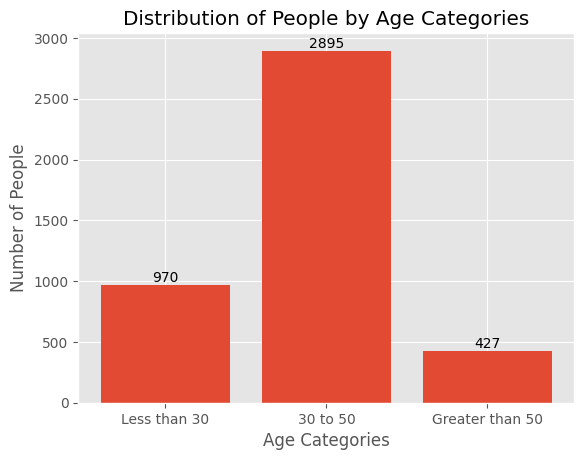

In [43]:
df = df.dropna()

age_less_than_30 = df[df['Age'] < 30]
age_between_30_and_50 = df[(df['Age'] >= 30) & (df['Age'] < 50)]
age_greater_than_50 = df[df['Age'] > 50]


count_less_than_30 = len(age_less_than_30)
count_between_30_and_50 = len(age_between_30_and_50)
count_greater_than_50 = len(age_greater_than_50)


age_categories = ['Less than 30', '30 to 50', 'Greater than 50']
count_people = [count_less_than_30, count_between_30_and_50, count_greater_than_50]

for i, count in enumerate(count_people):
    plt.annotate(f'{count}', (i, count), ha='center', va='bottom')
    
plt.bar(age_categories, count_people)
plt.xlabel('Age Categories')
plt.ylabel('Number of People')
plt.title('Distribution of People by Age Categories')
plt.show()




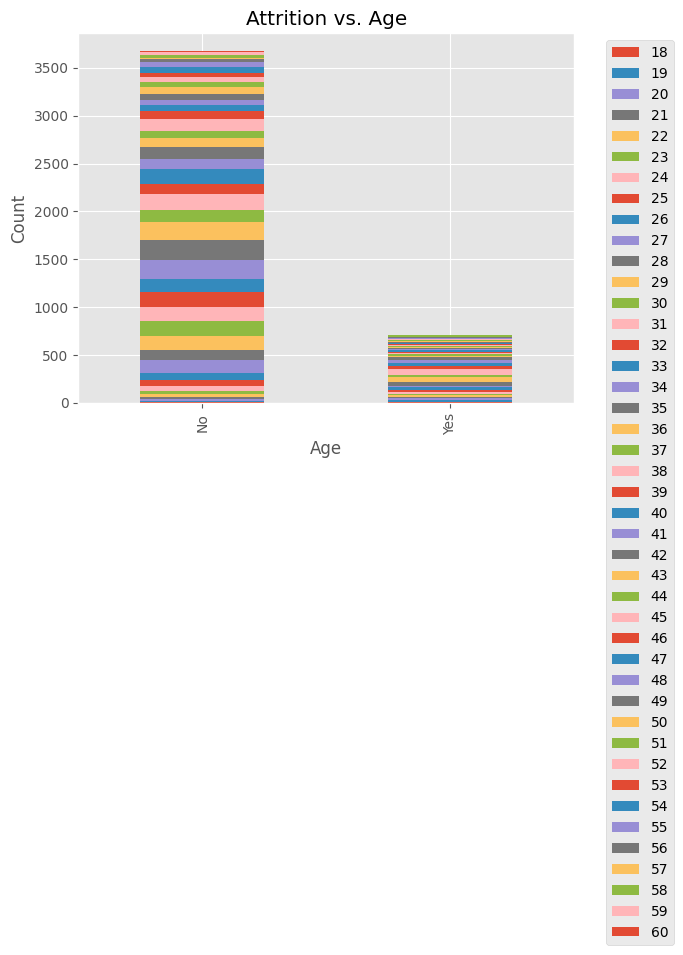

In [44]:
#attrition vs. age
attrition_counts = df.groupby(['Attrition', 'Age']).size().unstack()
ax = attrition_counts.plot(kind='bar', stacked=True)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Attrition vs. Age')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


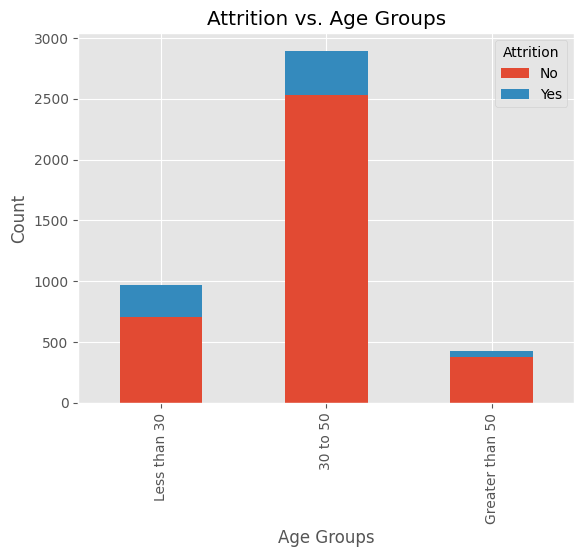

In [45]:
age_groups = ['Less than 30', '30 to 50', 'Greater than 50']

age_less_than_30 = df[df['Age'] < 30]
age_between_30_and_50 = df[(df['Age'] >= 30) & (df['Age'] < 50)]
age_greater_than_50 = df[df['Age'] > 50]


attrition_counts = [
    age_less_than_30['Attrition'].value_counts(),
    age_between_30_and_50['Attrition'].value_counts(),
    age_greater_than_50['Attrition'].value_counts()
]

attrition_df = pd.DataFrame(attrition_counts, index=age_groups)
attrition_df.plot(kind='bar', stacked=True)


plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Attrition vs. Age Groups')


plt.show()

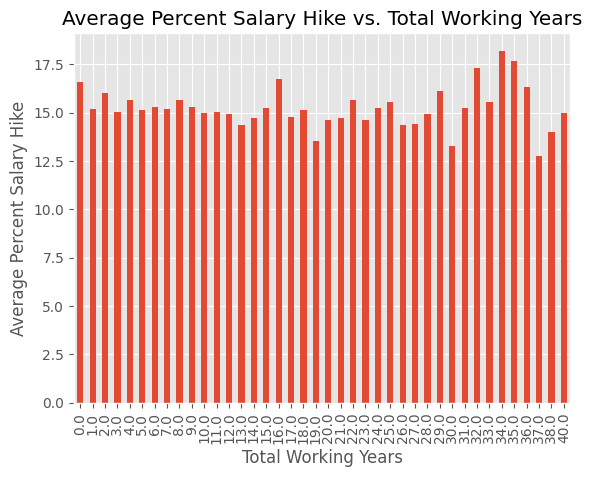

In [46]:
avg_salary_hike = df.groupby('TotalWorkingYears')['PercentSalaryHike'].mean()

avg_salary_hike.plot(kind='bar')

plt.xlabel('Total Working Years')
plt.ylabel('Average Percent Salary Hike')
plt.title('Average Percent Salary Hike vs. Total Working Years')

plt.show()


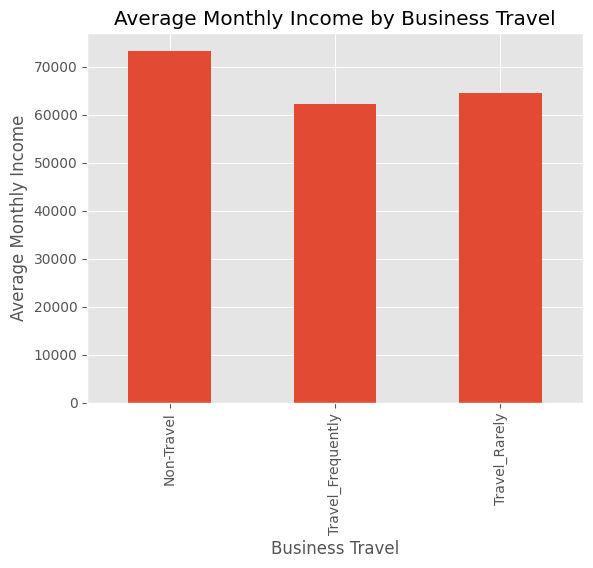

In [47]:
avg_monthly_income = df.groupby('BusinessTravel')['MonthlyIncome'].mean()

avg_monthly_income.plot(kind='bar')

plt.xlabel('Business Travel')
plt.ylabel('Average Monthly Income')
plt.title('Average Monthly Income by Business Travel')

plt.show()

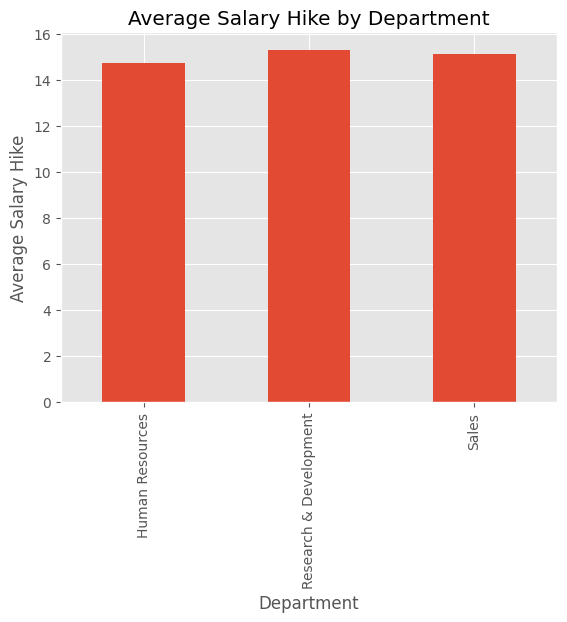

In [48]:
avg_salary_hike = df.groupby('Department')['PercentSalaryHike'].mean()

avg_salary_hike.plot(kind='bar')

plt.xlabel('Department')
plt.ylabel('Average Salary Hike')
plt.title('Average Salary Hike by Department')

plt.show()

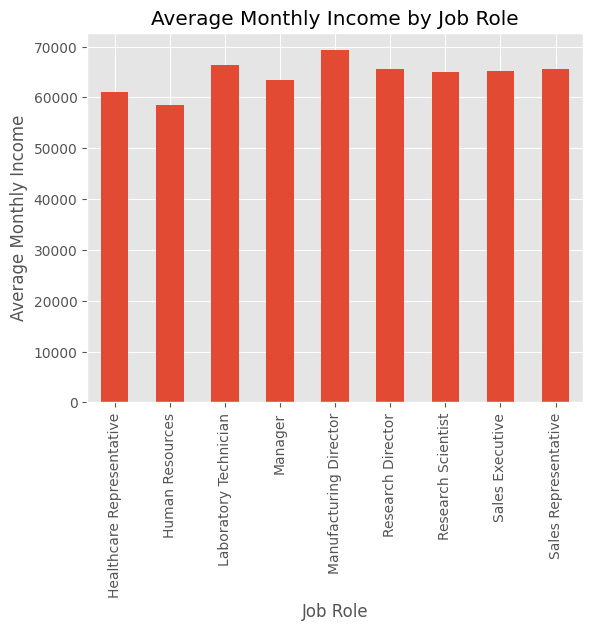

In [49]:
avg_monthly_income = df.groupby('JobRole')['MonthlyIncome'].mean()
plt.style.use('ggplot')
avg_monthly_income.plot(kind='bar')

plt.xlabel('Job Role')
plt.ylabel('Average Monthly Income')
plt.title('Average Monthly Income by Job Role')

plt.show()

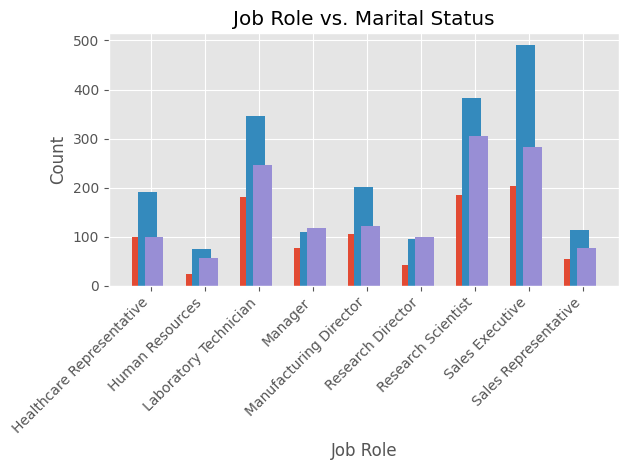

In [50]:

job_marital_cross_tab = pd.crosstab(df['JobRole'], df['MaritalStatus'])

job_roles = job_marital_cross_tab.index
marital_statuses = job_marital_cross_tab.columns

bar_width = 0.35

x = np.arange(len(job_roles))

fig, ax = plt.subplots()
for i, marital_status in enumerate(marital_statuses):
    ax.bar(x - bar_width/2 + i*bar_width/len(marital_statuses), job_marital_cross_tab[marital_status], bar_width, label=marital_status)

plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title('Job Role vs. Marital Status')

plt.xticks(x, job_roles, rotation=45, ha='right')

plt.tight_layout()

plt.show()

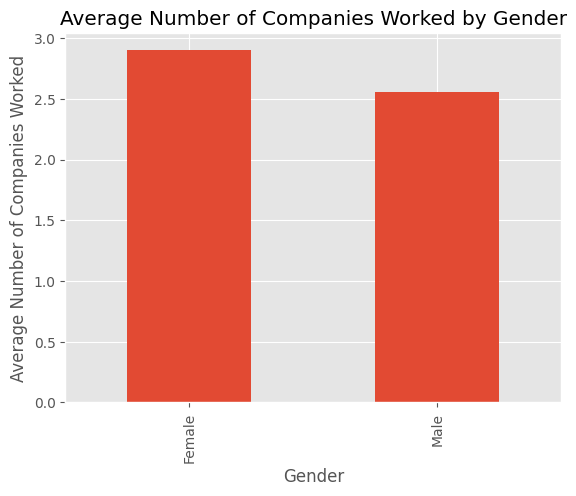

In [54]:
avg_companies_worked = df.groupby('Gender')['NumCompaniesWorked'].mean()

avg_companies_worked.plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Average Number of Companies Worked')
plt.title('Average Number of Companies Worked by Gender')

plt.show()

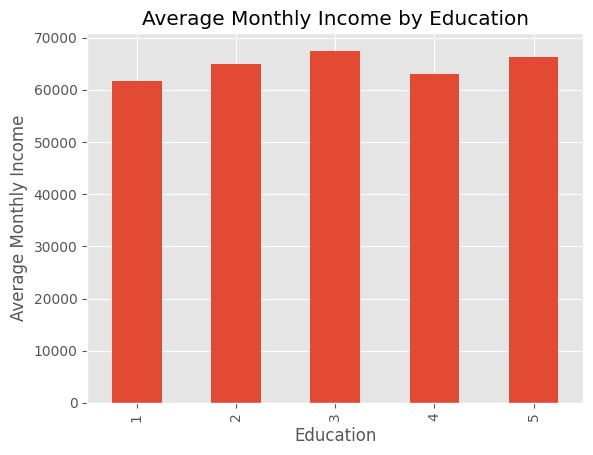

In [56]:
avg_monthly_income = df.groupby('Education')['MonthlyIncome'].mean()

avg_monthly_income.plot(kind='bar')

plt.xlabel('Education')
plt.ylabel('Average Monthly Income')
plt.title('Average Monthly Income by Education')

plt.show()

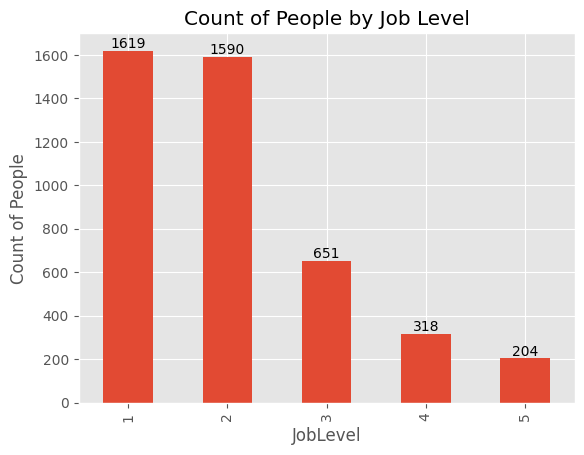

In [62]:
job_level_counts = df['JobLevel'].value_counts()

job_level_counts.plot(kind='bar')

plt.xlabel('Job Level')
plt.ylabel('Count of People')
plt.title('Count of People by Job Level')
ax = job_level_counts.plot(kind='bar')

for i, count in enumerate(job_level_counts):
    ax.annotate(str(count), (i, count), ha='center', va='bottom')
# Show the plot
plt.show()

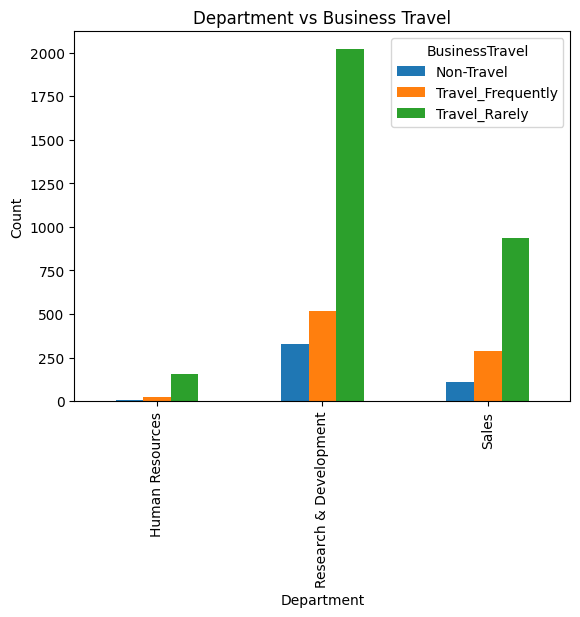

In [68]:
grouped_counts = df.groupby(['Department', 'BusinessTravel']).size().unstack()
plt.style.use('default')

grouped_counts.plot(kind='bar')

plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Department vs Business Travel')


plt.show()

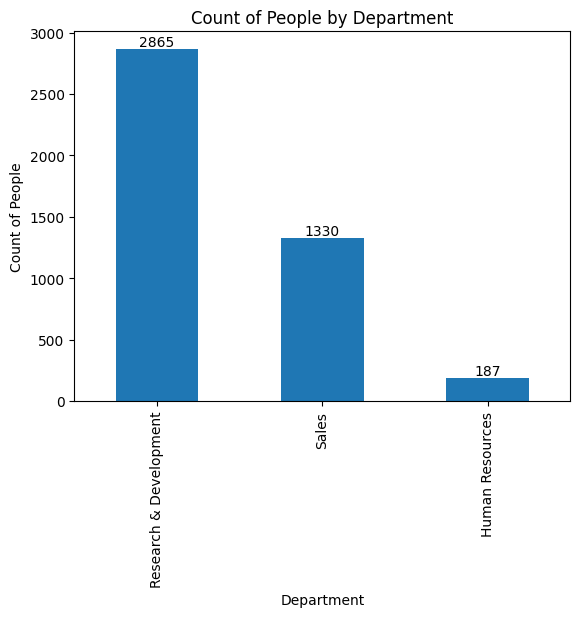

In [72]:
department_counts = df['Department'].value_counts()


ax = department_counts.plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Count of People')
plt.title('Count of People by Department')


for i, count in enumerate(department_counts):
    ax.annotate(str(count), (i, count), ha='center', va='bottom')

plt.show()

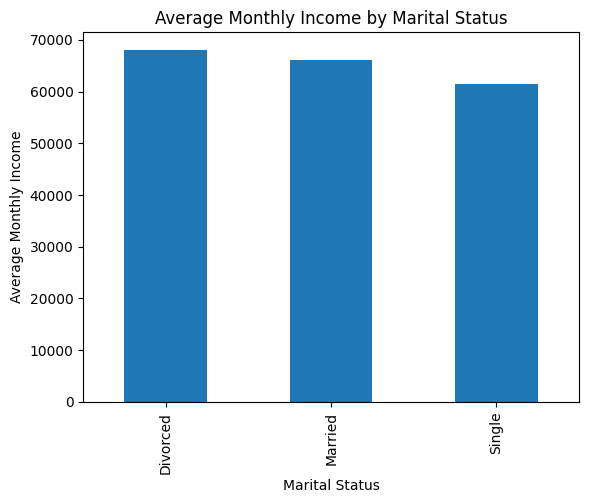

In [73]:
avg_monthly_income = df.groupby('MaritalStatus')['MonthlyIncome'].mean()


avg_monthly_income.plot(kind='bar')

plt.xlabel('Marital Status')
plt.ylabel('Average Monthly Income')
plt.title('Average Monthly Income by Marital Status')


plt.show()

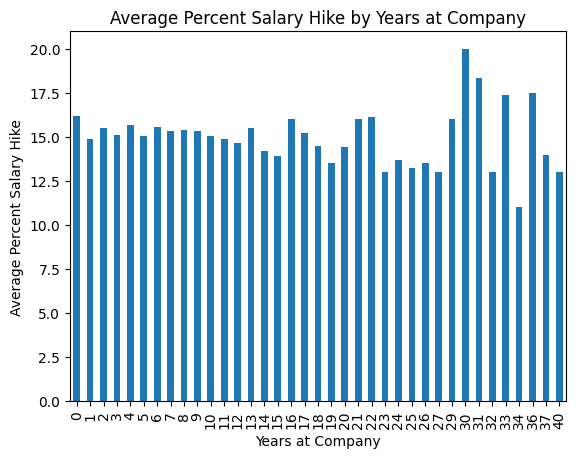

In [75]:
avg_salary_hike = df.groupby('YearsAtCompany')['PercentSalaryHike'].mean()

# Create a bar plot of average PercentSalaryHike vs. YearsAtCompany
avg_salary_hike.plot(kind='bar')

# Set the plot labels and title
plt.xlabel('Years at Company')
plt.ylabel('Average Percent Salary Hike')
plt.title('Average Percent Salary Hike by Years at Company')

# Show the plot
plt.show()

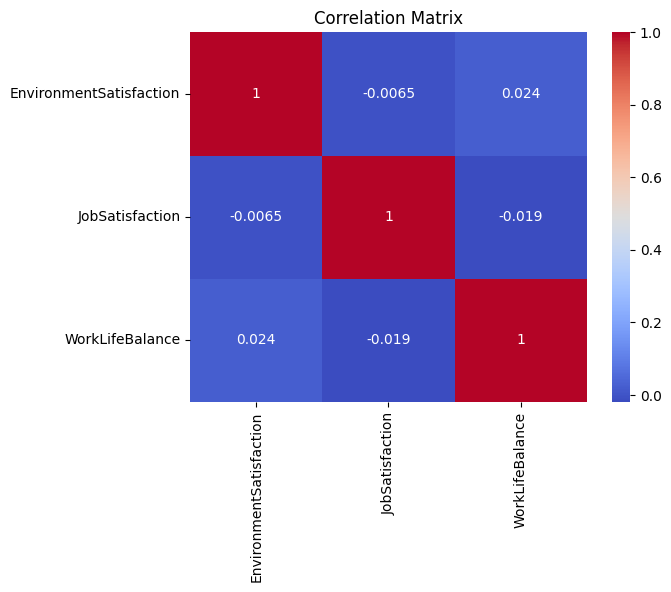

In [77]:
import seaborn as sns

df=pd.read_csv('employee_survey_data.csv')

cols_of_interest = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
data = df[cols_of_interest]


correlation_matrix = data.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()


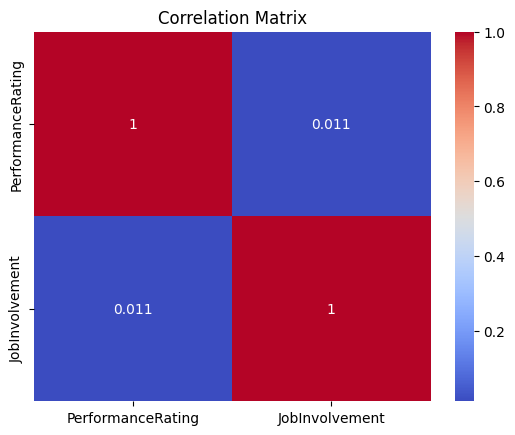

In [80]:
df = pd.read_csv('manager_survey_data.csv')

cols_of_interest = ['PerformanceRating', 'JobInvolvement']
data = df[cols_of_interest]

correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()


In [82]:
print('''

Based on the analysis of the provided dataset and the generated graphs, here are some insights that can be derived:

1.Age vs. Attrition:
The attrition rate tends to be higher among younger employees (age less than 30) compared to other age groups.
Employees in the age group of 31-50 also show a significant attrition rate.
2.Percent Salary Hike vs. Total Working Years:
There is a negative correlation between percent salary hike and total working years, indicating that as the total working years increase, the average percent salary hike tends to decrease.
3.Business Travel vs. Percent Salary Hike:
Employees who travel rarely or do not travel at all tend to receive a higher average percent salary hike compared to frequent travelers.
4.Business Travel vs. Years at Company:
Employees who travel rarely or do not travel have a higher average number of years at the company compared to frequent travelers.
5.Business Travel vs. Monthly Income:
Employees who travel frequently tend to have higher average monthly incomes compared to those who travel rarely or do not travel.
6.Average Salary Hike vs. Department:
Different departments exhibit variations in average salary hikes, suggesting potential differences in compensation strategies across departments.
7.Job Role vs. Average Monthly Income:
Different job roles within the organization have varying average monthly incomes, indicating income disparities between different positions.
8.Gender vs. Percent Salary Hike:
There may be differences in average percent salary hikes between genders, although further analysis is required to draw conclusive insights.
9.Gender vs. Number of Companies Worked:
There may be variations in the average number of companies worked for different genders, indicating potential gender-related differences in career paths.
10.Job Level vs. Average Monthly Income:
Higher job levels tend to be associated with higher average monthly incomes, indicating a positive correlation between job level and income.
11.Marital Status vs. Average Monthly Income:
Marital status does not appear to have a significant impact on average monthly income, as the average incomes across different marital statuses are relatively similar.

''')




Based on the analysis of the provided dataset and the generated graphs, here are some insights that can be derived:

1.Age vs. Attrition:
The attrition rate tends to be higher among younger employees (age less than 30) compared to other age groups.
Employees in the age group of 31-50 also show a significant attrition rate.
2.Percent Salary Hike vs. Total Working Years:
There is a negative correlation between percent salary hike and total working years, indicating that as the total working years increase, the average percent salary hike tends to decrease.
3.Business Travel vs. Percent Salary Hike:
Employees who travel rarely or do not travel at all tend to receive a higher average percent salary hike compared to frequent travelers.
4.Business Travel vs. Years at Company:
Employees who travel rarely or do not travel have a higher average number of years at the company compared to frequent travelers.
5.Business Travel vs. Monthly Income:
Employees who travel frequently tend to have high